In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8&dl=0

--2024-10-30 10:45:28--  https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce32e8e5314c2e4d533c043e455.dl.dropboxusercontent.com/cd/0/inline/CdYw-vNI35-7d_0gI01h2mWW7sjRNR0aU-Rz65dxnpZnZL8kZUT6pR4XATjGWd34-GYi7QLH1OUibXmIRzOqIgMAj7ofDU5sG0fIz4diRBu23hZdEDd2bwocyMXroP-F_NGCCMf-UsUvfICndc10Y4R3/file# [following]
--2024-10-30 10:45:29--  https://uce32e8e5314c2e4d533c043e455.dl.dropboxusercontent.com/cd/0/inline/CdYw-vNI35-7d_0gI01h2mWW7sjRNR0aU-Rz65dxnpZnZL8kZUT6pR4XATjGWd34-GYi7QLH1OUibXmIRzOqIgMAj7ofDU5sG0fIz4diRBu23hZdEDd2bwocyMXroP-F_NGCCMf-UsUvfICndc10Y4R3/file
Resolving uce32e8e5314c2e4d533c043e455.dl.dropboxusercontent.com (uce32e8e5314c2e4d533c043e455.dl.dropboxusercontent.com)... 162.125.81.1

In [ ]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
!wget https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s&dl=0

--2024-10-30 10:45:33--  https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4fda86d75794ce8c2207246527.dl.dropboxusercontent.com/zip_download_get/CA3606KCoJtjI3QnDx1zS14SoMSMQVHqRRcvA2Oidn1zt_cg-Lru_CVhodieLqoNuG64XyPnFzUJbOu2yNAwKv-HHHPCViqlTYZX74rbbXVlgA# [following]
--2024-10-30 10:45:37--  https://uc4fda86d75794ce8c2207246527.dl.dropboxusercontent.com/zip_download_get/CA3606KCoJtjI3QnDx1zS14SoMSMQVHqRRcvA2Oidn1zt_cg-Lru_CVhodieLqoNuG64XyPnFzUJbOu2yNAwKv-HHHPCViqlTYZX74rbbXVlgA
Resolving uc4fda86d75794ce8c2207246527.dl.dropboxusercontent.com (uc4fda86d75794ce8c2207246527.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6030:15::a27d:500f
Connecting to uc4fda86d75794ce8c2207246527.dl.dropboxusercontent.com 

In [ ]:
!unzip h?rlkey=qra18nhi1jpk2m7r0vv1umr9s

Streaming output truncated to the last 5000 lines.
 extracting: Flickr_Data/Flickr_Data/Images/3435015880_eda46ff50f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3475005101_6f6e437459.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3479050296_65bcea69a0.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3486538055_bcf4d3dfda.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3494105596_f05cb0d56f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3500136982_bf7a85531e.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3521201948_9049197f20.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3529211822_1dabdb3a9c.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532205154_5674b628ea.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532587748_7e64bb223a.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3540598210_972f0ff573.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3547000169_40191e02ca.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3549011001_26cace3646.jpg  
 extracting: 

In [ ]:
####IMPORTS###
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import collections
import tensorflow_hub as hub
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import plot_model
from keras.layers import Add
from keras.preprocessing import image
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.utils import pad_sequences
import pickle
from keras.models import Model, load_model
from keras.layers import Input,Dense, Dropout, Embedding, LSTM ,GRU
from keras.utils import to_categorical

In [ ]:
def read_text(path):
  with open(path,'r') as f:
    captions = f.read()
  return captions

def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()

  sentence = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  return sentence

def get_Cleaned_Descriptions(captions):
  descriptions = {}

  for caption in captions:
    id,cap = caption.split('\t')
    id = id[:-2]
    if descriptions.get(id) is None:
      descriptions[id] = []
    descriptions[id].append(cap)
  for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
      caption_list[i] = clean_text(caption_list[i])
  return descriptions

def get_Vocabulary(descriptions):
  vocab = set()
  for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
  return vocab

def get_TotalWords(descriptions):
  total_words = []
  for key in descriptions.keys():
    [total_words.append(i) for sentence in descriptions[key] for i in sentence.split()]
  counter = collections.Counter(total_words)
  freq_counter = dict(counter)
  sorted_freq_counts = sorted(freq_counter.items(),reverse = True, key = lambda x:x[1])
  threshold = 10
  sorted_freq_counts = [x for x in sorted_freq_counts if x[1]>threshold]
  total_words =[x[0] for x in sorted_freq_counts]
  return total_words,sorted_freq_counts;

def add_StartEndTokens(descriptions, data):
  train_desc = {}

  for _id in data:
    if _id in descriptions:
      train_desc[_id] = []
      for cap in descriptions[_id]:
        cap_to_add = "startseq "+cap+ " endseq"
        train_desc[_id].append(cap_to_add)
    else:
      print(f"Missing description for image ID: {_id}")
  return train_desc

def get_word_to_idx(total_words):
  word_to_idx = {}
  idx_to_word = {}
  for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word
  print(len(word_to_idx))
  word_to_idx['startseq'] = 1846
  word_to_idx['endseq'] = 1847
  idx_to_word[1846] = 'startseq'
  idx_to_word[1847] = 'endseq'
  vocab_size = len(word_to_idx)+1
  return word_to_idx,idx_to_word,vocab_size


import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    x1, x2, y = [], [], []
    n = 0
    while True:
        for key, caps in train_desc.items():
            photo = train_encoded[key]
            if photo.shape != (4096,):
                photo = np.reshape(photo, (4096,))
            for cap in caps:
                seq = [word_to_idx[word] for word in cap.split() if word in word_to_idx]
                for i in range(1, len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    xi = pad_sequences([xi], maxlen=maxlength, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=vocab_size)[0]
                    x1.append(photo)  # Image features
                    x2.append(xi)     # Text input sequence
                    y.append(yi)      # Target word (one-hot encoded)

            n += 1
            if n == batch_size:
                yield (np.array(x1), np.array(x2)), np.array(y)
                x1, x2, y = [], [], []
                n = 0

# Wrap generator in a tf.data.Dataset
def create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength),
        output_signature=(
            (tf.TensorSpec(shape=(None, train_encoded[next(iter(train_encoded))].shape[0]), dtype=tf.float32),
             tf.TensorSpec(shape=(None, maxlength), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
        )
    )
    return dataset

def train():
    loss = []
    dataset = create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35)

    for i in range(epochs):
        history = model.fit(dataset, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)
        loss.append(history.history['loss'][0])

        if (i+1) % 10 == 0:
            model.save('/content/drive/MyDrive/model_weight_VGG+GRU_EARLY_model_' + str(i+1) + '.h5')
    dict_loss = {'loss_VGG+GRU+early': loss}
    df = pd.DataFrame(dict_loss)
    df.to_csv('/content/drive/MyDrive/loss_early.csv')
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Embeddings will be added into the fusion model
def get_embedding_idx(glove_file):
  embedding_idx = {}

  for line in glove_file:
    values = line.split()
    word = values[0]
    word_embeddings = np.array(values[1:],dtype = 'float')
    embedding_idx[word] = word_embeddings
  return embedding_idx

def get_embedding_matrix(vocab_size,embedding_idx):
  embed_dim = 50
  matrix = np.zeros((vocab_size,embed_dim))
  for word,idx in word_to_idx.items():
    embed_vec = embedding_idx.get(word)
    if embed_vec is not None:
      matrix[idx] = embed_vec
  return matrix


In [ ]:
path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
captions = read_text(path)

In [ ]:
captions = captions.split('\n')
captions = captions[:-1]
print(len(captions))

40460


In [ ]:
train_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt"
test_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt"

In [ ]:
train_data = read_text(train_path)
test_data = read_text(test_path)
train_data = train_data.split('\n')
test_data = test_data.split('\n')
train_data = train_data[:-1]
test_data = test_data[:-1]

In [ ]:
descriptions = get_Cleaned_Descriptions(captions)
vocabulary = get_Vocabulary(descriptions)
total_words,sorted_freq_counts = get_TotalWords(descriptions)
add_StartEndTokens(descriptions,train_data)
add_StartEndTokens(descriptions,test_data)
word_to_idx,idx_to_word,vocab_size = get_word_to_idx(total_words)

1845


In [ ]:
print(descriptions['2513260012_03d33305cf.jpg'])
print(len(vocabulary))
print(len(total_words))
print(len(word_to_idx))
print(len(idx_to_word))
print(vocab_size)

['black dog is running after white dog in the snow', 'black dog chasing brown dog through snow', 'two dogs chase each other across the snowy ground', 'two dogs play together in the snow', 'two dogs running through low lying body of water']
8424
1845
1847
1847
1848


In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_training_features_VGG.pkl', 'rb') as file: # change name here
    train_encoded = pickle.load(file)

In [ ]:
print(train_encoded['2513260012_03d33305cf.jpg'].shape)

(4096,)


In [ ]:
glove_file = open("/content/drive/MyDrive/Images_Encoded/glove.6B.50d1.txtrlkey=rxrdka5i47xxfnszawwuub2r8")
embedding_idx = get_embedding_idx(glove_file)
embedding_matrix = get_embedding_matrix(vocab_size,embedding_idx)
glove_file.close()

In [ ]:
train_desc = add_StartEndTokens(descriptions,train_data)
test_desc = add_StartEndTokens(descriptions,test_data)

In [ ]:
print(len(train_desc))
print(len(test_desc))

6000
1000


In [ ]:
print(embedding_matrix.shape)

(1848, 50)


In [ ]:
!pip install pydot graphviz
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import Image
import pydot

def visualize_model(model):
    dot_img_file = 'model_1.png'
    # Generate a Graphviz representation of the model
    dot = model_to_dot(model, show_shapes=True, show_layer_names=True)

    # Create a PNG image from the Graphviz representation
    (graph,) = pydot.graph_from_dot_data(dot.to_string())
    graph.write_png(dot_img_file)

    # Display the image in the notebook
    return Image(filename=dot_img_file)

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, Concatenate, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:


# Image Model Input
input_img_features = Input(shape=(4096,))
inp1 = Dropout(0.3)(input_img_features)
inp2 = Dense(256, activation='relu')(inp1)

# Text Model Input
inp_cap = Input(shape=(35,))
inp_c1 = Embedding(input_dim=1848, output_dim=50, mask_zero = True)(inp_cap)
inp_c2 = Dropout(0.3)(inp_c1)
inp_c3 = GRU(256)(inp_c2)

# Early Fusion: Concatenate image and text features
fusion = Concatenate()([inp2, inp_c3])

# Process the fused features
fusion = Dense(1024, activation='relu')(fusion)
fusion = BatchNormalization()(fusion)  # Batch normalization for stable training
fusion = Dropout(0.5)(fusion)
fusion = Dense(512, activation='relu')(fusion)  # Increased complexity after fusion
fusion = BatchNormalization()(fusion)
fusion = Dropout(0.5)(fusion)
fusion = Dense(256, activation='relu')(fusion)

# Output layer
outputs = Dense(1848, activation='softmax')(fusion)

# Define the model
model = Model(inputs=[input_img_features, inp_cap], outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 4096)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 35, 50)         │         92,400 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 4096)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 35, 50)         │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 35)             │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      1,048,832 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 256)            │        236,544 │ dropout_1[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ dense[0][0], gru[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1024)           │        525,312 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1024)           │          4,096 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1024)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        524,800 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512)            │          2,048 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        131,328 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1848)           │        474,936 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,040,296 (11.60 MB)

 Trainable params: 3,037,224 (11.59 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:

embedding_layer = model.get_layer('embedding')
embedding_layer.set_weights([embedding_matrix])# Updating the words to their corresponding embedding for glove
model.layers[2].trainable = False

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

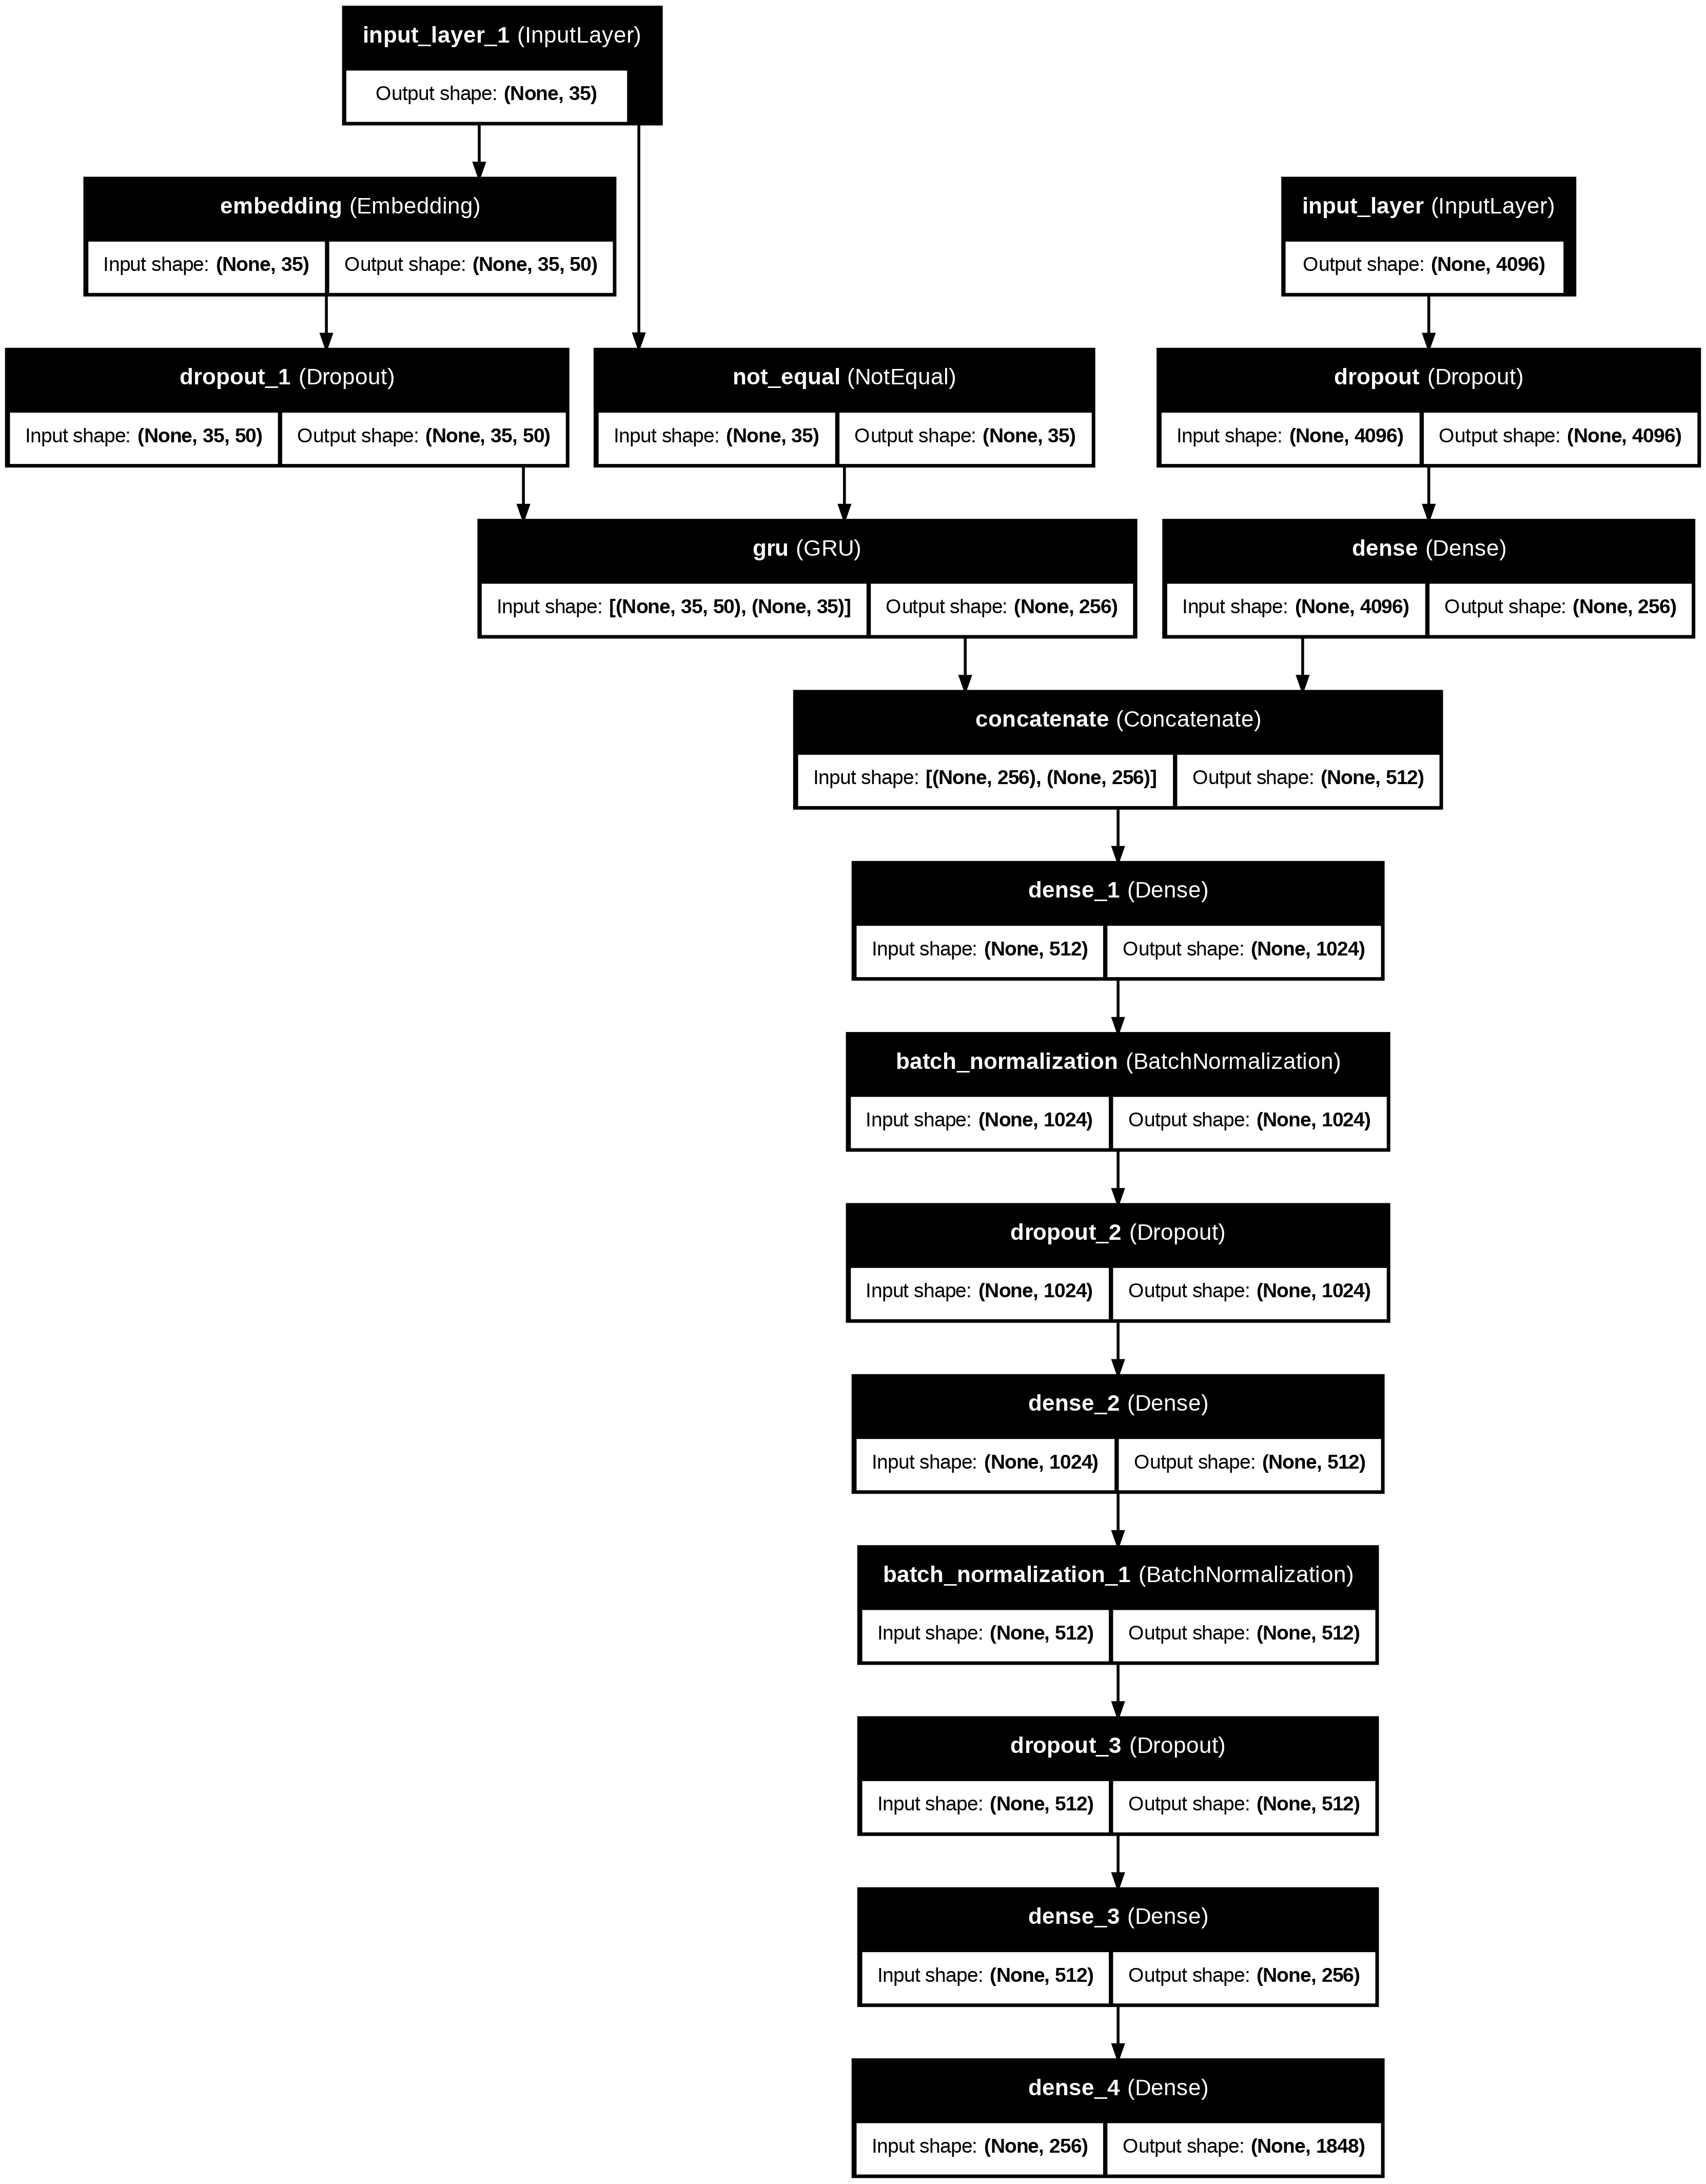

In [ ]:
visualize_model(model)

In [ ]:

epochs = 100
batch_size = 32
steps_per_epoch = len(train_desc) // batch_size

In [ ]:


generator = data_generator(train_desc,train_encoded,word_to_idx,batch_size,maxlength = 35)
x, y = next(generator)
print(x)
print(y)

(array([[0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362],
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362],
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362]], dtype=float32), array([[1846,    0,    0, ...,    0,    0,    0],
       [1846,   12,    0, ...,    0,    0,    0],
       [1846,   12,    6, ...,    0,    0,    0],
       ...,
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,    0,    0]], dtype=int32))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...

In [ ]:
print(len(train_desc))
print(len(train_encoded))

6000
6000


In [ ]:
import tensorflow as tf

In [ ]:
tf.config.run_functions_eagerly(True)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


187/187 ━━━━━━━━━━━━━━━━━━━━ 73s 353ms/step - loss: 5.4928
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - loss: 4.1701
187/187 ━━━━━━━━━━━━━━━━━━━━ 59s 316ms/step - loss: 3.8511
187/187 ━━━━━━━━━━━━━━━━━━━━ 57s 303ms/step - loss: 3.6555
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - loss: 3.5163
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 3.4093
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 295ms/step - loss: 3.3195
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 3.2475
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 3.1822
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 3.1302


187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 3.0796
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 297ms/step - loss: 3.0372
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - loss: 2.9966
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.9621
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - loss: 2.9297
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - loss: 2.8953
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 295ms/step - loss: 2.8678
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.8428
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.8143
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 295ms/step - loss: 2.7933


187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 296ms/step - loss: 2.7689
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 291ms/step - loss: 2.7483
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.7293
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.7110
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.6932
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 2.6741
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.6626
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 297ms/step - loss: 2.6447
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.6326
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 291ms/step - loss: 2.6166


187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 295ms/step - loss: 2.6052
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - loss: 2.5908
187/187 ━━━━━━━━━━━━━━━━━━━━ 56s 297ms/step - loss: 2.5770
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.5673
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 2.5585
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.5425
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.5384
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 2.5293
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.5174
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.5090


187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.5009
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.4918
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.4813
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 291ms/step - loss: 2.4771
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.4679
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.4615
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.4519
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.4446
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - loss: 2.4388
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - loss: 2.4339


187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.4253
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 291ms/step - loss: 2.4171
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.4146
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.4085
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.3974
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.3950
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.3910
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.3883
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.3821
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.3757


187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.3694
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.3720
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - loss: 2.3626
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.3578
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.3494
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.3449
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 296ms/step - loss: 2.3472
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 284ms/step - loss: 2.3374
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 296ms/step - loss: 2.3339
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 284ms/step - loss: 2.3263


187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.3240
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.3224
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.3157
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.3155
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.3075
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.3084
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - loss: 2.3023
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.3002
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.2939
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.2887


187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 2.2931
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.2830
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 286ms/step - loss: 2.2827
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.2798
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.2785
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - loss: 2.2706
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 284ms/step - loss: 2.2693
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.2647
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - loss: 2.2631
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.2570


187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.2579
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.2552
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.2499
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.2526
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 288ms/step - loss: 2.2467
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - loss: 2.2456
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 296ms/step - loss: 2.2421
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - loss: 2.2394
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - loss: 2.2369
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - loss: 2.2335


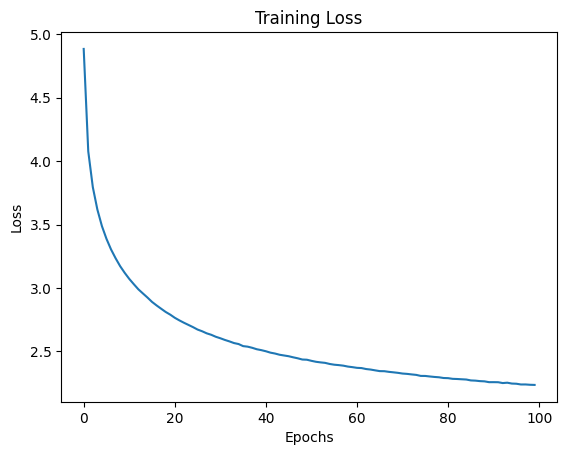

In [ ]:

train()

In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_testing_features_VGG.pkl', 'rb') as file:
    test_encoded = pickle.load(file)

In [ ]:
def predict(photo):
  in_text = "startseq"
  for i in range(35):
    sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
    sequence = pad_sequences([sequence],maxlen = 35, padding = 'post')

    y_pred = model.predict([photo,sequence])
    y_pred = y_pred.argmax()

    word = idx_to_word[y_pred]

    in_text += (" "+ word)
    if (word == "endseq"):
      break
  final_cap = in_text.split()
  caption_req = final_cap[1:-1]
  caption_req = " ".join(caption_req)
  return caption_req

In [ ]:
ori_img_path = "Flickr_Data/Flickr_Data/Images/"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Text(0.5, 1.0, 'woman in black coat and sunglasses stands next to woman in black coat')

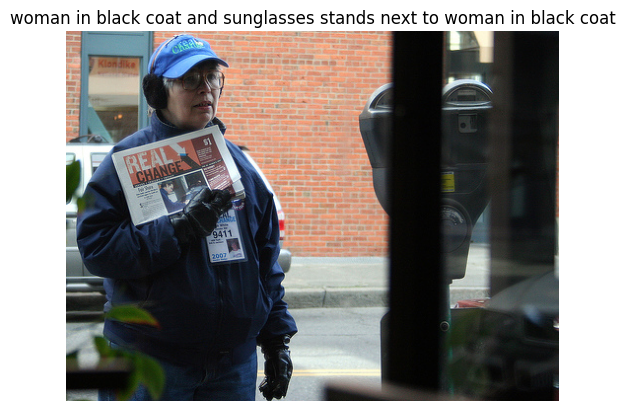

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Text(0.5, 1.0, 'young boy wearing red shirt and khaki is riding skateboard on the beach')

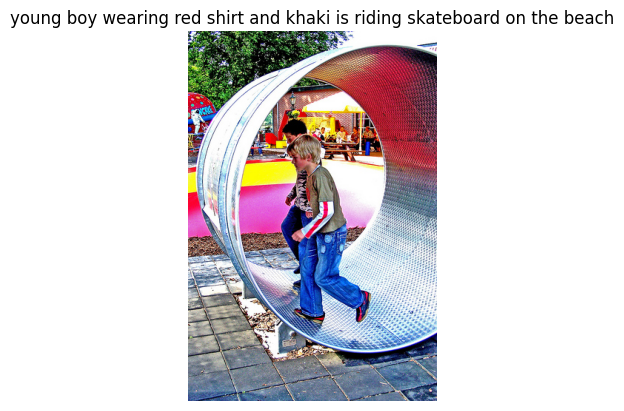

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Text(0.5, 1.0, 'group of people are standing on rock overlooking')

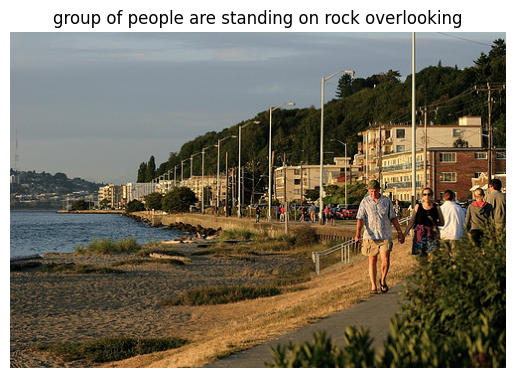

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Text(0.5, 1.0, 'little girl in pink dress is walking with red toy')

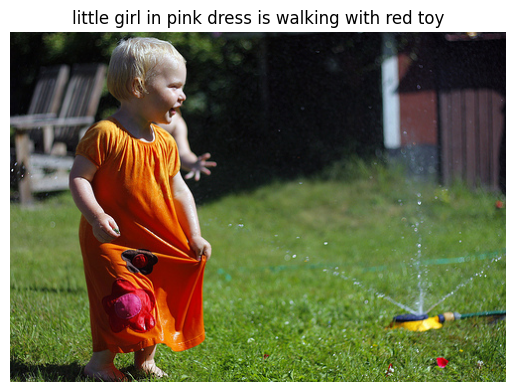

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Text(0.5, 1.0, 'man on bmx bike is being ridden on the street')

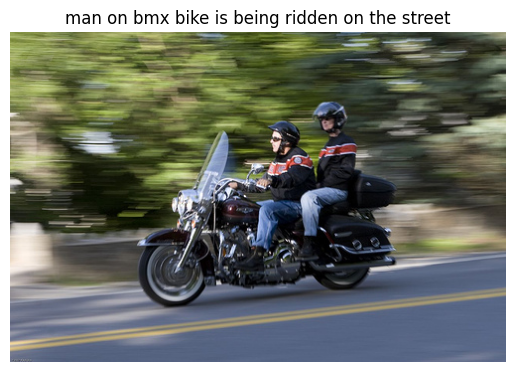

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)